# Hoja de trabajo Regresión Lineal Regularizada

In [20]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate
from gradient_descent import gradient_descent

# Leer el archivo CSV proporcionado
Lo primero que haremos es obtener los datos del csv

In [3]:
csv = pandas.read_csv('Admission_Predict.csv')

# Análisis de datos

En esta sección analizaremos con cual de los features nos conviene trabajar, para eso lo que haremos sera plotear cada una de las variables independientes con la variable dependinte que para esta hoja de trabajo es "Chance of admit", lo que esperamos encontrar es cual de estas combinaciones nos generan una buena relación y asi encontrar el mejor modelo.

## GRE Score vs Chance of admit

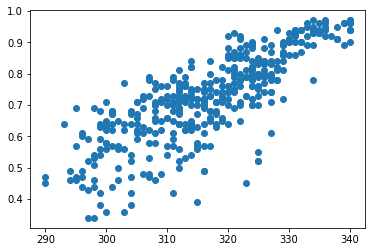

In [28]:
x = csv['GRE Score']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

Como podemos observar en la gráfica anterior a medida que aumenta el GRE Score más chance tiene el estudiante de ser admitido, es decir si hay una relación directa entre el GRE Score y el Chance of admit, por lo que trabajaremos con ella. 

## TOEFL Score vs Chance of Admit

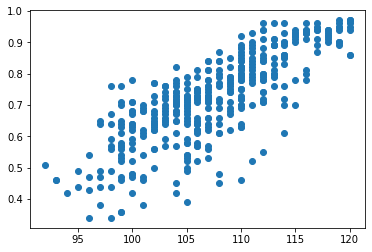

In [27]:
x = csv['TOEFL Score']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

En esta grafica también notamos una relación directa entre el TOEFL Score y el chance of admit porque a medida que el TOEFL Score aumenta más chance tiene el estudiante de ser aceptado, entonces también utilizaremos esta feature.

## University Rating vs Chance of Admit

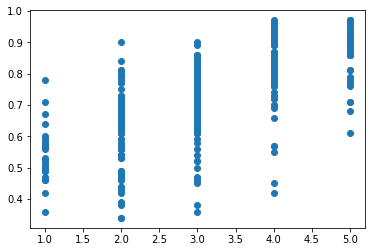

In [26]:
x = csv['University Rating']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

Esta relación no es tan definida por lo que no utilizaremos esta feature.

## SOP vs Chance of Admit

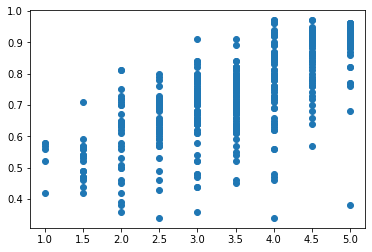

In [25]:
x = csv['SOP']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

Aquí tampoco encontramos una relación directa entre las variables, entonces tampoco utilizaremos esta variable.

## LOR vs Chance of Admit

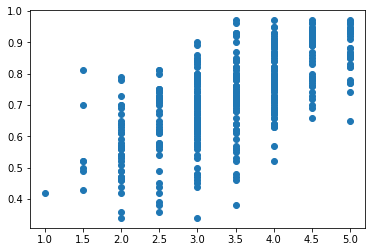

In [24]:
x = csv['LOR']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

Tampoco trabajaremos con LOR porque no tiene una relación con la probabilidad que tiene un estudiante de ser admitido.

## CGPA vs Chance of Admit

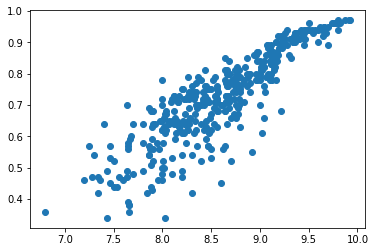

In [23]:
x = csv['CGPA']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

CGPA si tiene una relación directa con Chance of admit, a medida que más CGPA tenga un estudiante más probabilidad tendrá de ser admitido por lo que trabajaremos con esta variable también.

## Research vs Chance of Admit

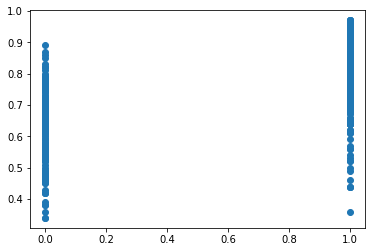

In [22]:
x = csv['Research']
y = csv ['Chance of Admit']
plt.scatter(x, y)
plt.show()

Por último evaluamos Research y concluimos que no la utilizamos porque no tiene ninguna relación con chande of admit


Para verificar aun que lo que hemos visto realizaremos un mapa con heatmap para comparar todas las features contra todas y así confirmar nuestras tres features.

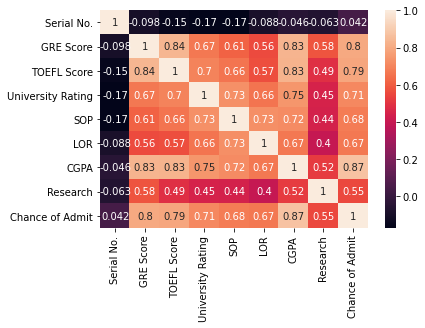

In [21]:
sns.heatmap(csv.corr(),annot=True)

Como el heatmap lo ha confirmado las features que mejor relacion tienen con chance of admit tiene son: GRE Score, TOEFL Score y CGPA, y por tanto con estas vamos a trabajar.

# Separación de nuestro dataset

Lo que haremos en esta sección será separar nuestro dataset entre el traning set (60% de los datos) , cross validation set (20% de los datos) y el test set (20% de los datos), para esto y para que ninguna de la secciones favorezca a las predicciones lo primero que haremos será randomizar nuestro dataset y así los datos estén homogéneamente randomizados

In [31]:
csv = pandas.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit'])
dataset = np.array(csv)

#Aqui randomizamos nuestro data set
np.random.shuffle(dataset)

#Aqui separamos nuestro data set
training_set, validation_set, test_set = dataset[:240,:], dataset[240:320,:], dataset[320:,:]

# Encontrar y Ajustar el modelo

Para encontrar nuestro modelo nuestra estrategia será evaluar feature for feature para observar su comportamiento individual para luego tomar la mejor decisión al mezclarlas si así lo requerimos, en esta sección estaremos ajustando nuestro modelo para que quede lo mejor posible.

## Encontrar el grado del polinomio utilzando la variable GRE Score

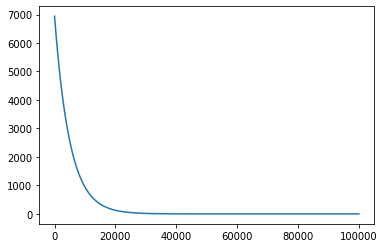

In [322]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[0]

xvts = validation_set.T[0]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000000001,
    treshold=0.001,
    max_iter=100000,
    l=300
)

plt.plot(np.arange(len(costs)), costs)
plt.show()

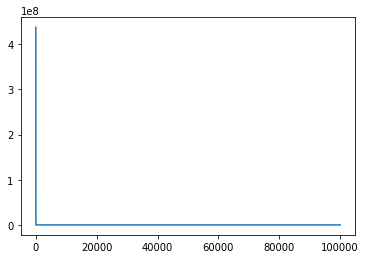

In [321]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[0]

xvts = validation_set.T[0]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts,
        xts**2
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts,
        xvts**2
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00000000001,
    treshold=0.001,
    max_iter=100000,
    l=300
)

plt.plot(np.arange(len(costs)), costs)
plt.show()

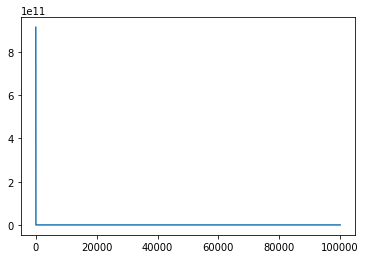

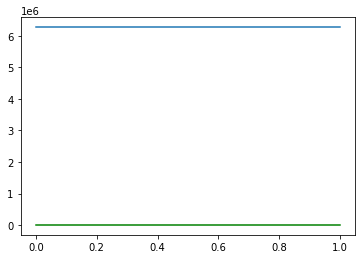

In [298]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[0]

xvts = validation_set.T[0]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts,
        xts**2,
        xts**3
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts,
        xvts**2,
        xvts**3
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000000000000001,
    treshold=0.000001,
    max_iter=100000,
    l=300
)

plt.plot(np.arange(len(costs)), costs)
plt.show()


cost_train = []
cost_cv = []

for i in range(0, 2, 1):
    cost_train.append(linear_cost(X ,y,theta, 300))
    cost_cv.append(linear_cost(Xcv ,ycv,theta, 300))

plt.plot(np.arange(0, 2, 1), cost_train);
plt.plot(np.arange(0, 2, 1), cost_cv, color="green");
plt.show()

Segun las graficas evaluadas de los grados del uno al tres nos quedaremos con el grado uno, porque fue el que mas se acoplo, ademas de ser el que menos baias y variance tenia

# Encontrar el grado del polinomio utilzando la variable TOEFL Score

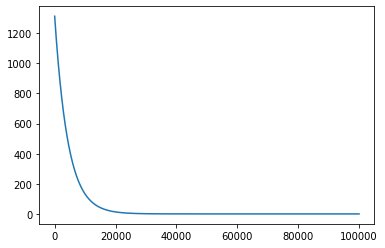

In [320]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[1]

xvts = validation_set.T[1]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00000001,
    treshold=0.000001,
    max_iter=100000,
    l=300
)

plt.plot(np.arange(len(costs)), costs)
plt.show()

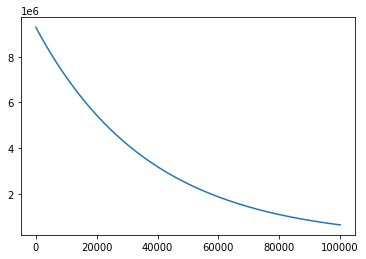

In [319]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[1]

xvts = validation_set.T[1]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts,
        xts**2
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts,
        xvts**2
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000000000001,
    treshold=0.000001,
    max_iter=100000,
    l=300
)

plt.plot(np.arange(len(costs)), costs)
plt.show()

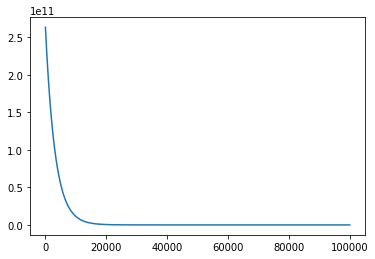

In [333]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[1]

xvts = validation_set.T[2]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts,
        xts**2,
        xts**3
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts,
        xvts**2,
        xvts**3
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000000000000001,
    treshold=0.000001,
    max_iter=100000,
    l=3000
)

plt.plot(np.arange(len(costs)), costs)
plt.show()

En estas graficas evaluadas en los grados del uno al tres nos quedaremos con el grado tres por ser el que mejor grafico de costo tuvo.

# Encontrar el grado del polinomio utilzando la variable CGPA

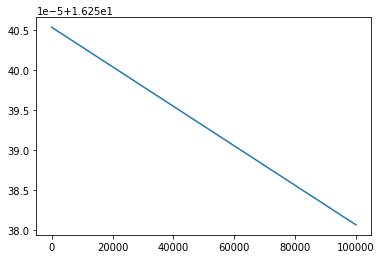

In [332]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[2]

xvts = validation_set.T[2]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000000000001,
    treshold=0.000001,
    max_iter=100000,
    l=300
)

plt.plot(np.arange(len(costs)), costs)
plt.show()

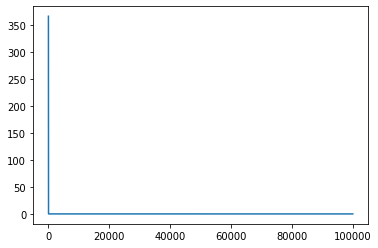

[[ 0.4721327 ]
 [-0.17791379]
 [ 0.02403602]]


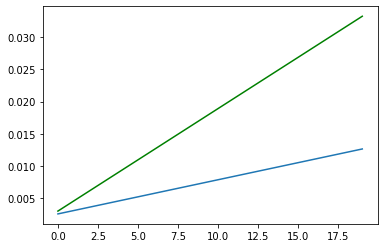

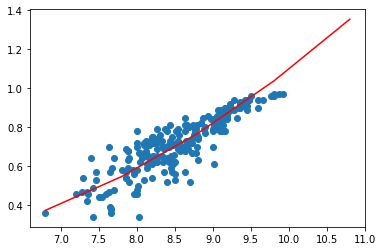

In [353]:
#Seteamos el training set de la variable toefl score
xts = training_set.T[2]

xvts = validation_set.T[2]

X = np.vstack(
    (
    	np.ones(len(xts)),
        xts,
        xts**2
    )
).T
Xcv = np.vstack(
    (
    	np.ones(len(xvts)),
        xvts,
        xvts**2
    )
).T
m,n = X.shape

#variable dependiente chance of admit
y = training_set.T[3]
y = y.reshape(len(xts), 1)
ycv = validation_set.T[3].reshape(80, 1)

#theta inicial
theta_0 = np.random.rand(n,1)

#Utilizamos el decensio del grandiente con nuestras funciones de costo regularizada y derivada del costo regularizada.
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0001,
    treshold=0.000001,
    max_iter=100000,
    l=7
)

plt.plot(np.arange(len(costs)), costs)
plt.show()


cost_train = []
cost_cv = []


print(theta)

#Analisis Lamnda
for i in range(0, 20, 1):
    cost_train.append(linear_cost(X ,y,theta, i))
    cost_cv.append(linear_cost(Xcv ,ycv,theta, i))

plt.plot(np.arange(0, 20, 1), cost_train);
plt.plot(np.arange(0, 20, 1), cost_cv, color="green");
plt.show()

plotArray = np.arange(min(xts),11)
l = plotArray.shape
plt.scatter(xts, y)
plt.plot(plotArray, np.matmul(np.vstack((np.ones(l),plotArray,plotArray**2)).T, theta), color='red')
plt.show()

Después de evaluar el feature CGPA creemos que es el que más se apague a nuestros datos, después de realizar las gráficas costo,lambda y de graficar la regresión lineal.

# Analisis Lambda

Para el analisis lambda lo que se hizo fue analizar la grafica de costo contra cada lambda que daba, el lambda que mejor resulto fue 7 ya que no era el punto intermedio entre baias y variance.

# Conclusión

Nuestro modelo fue Y = 0.4721327 + 0.17791379x1 + 0.02403602x2